# Lab #8

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

## Esercizio 1

In [2]:
#functions
def f1(x):
    x = np.array(x)
    return x*np.sin(x) + 2*x

def f2(x):
    x = np.array(x)
    return 10*np.sin(x) + x**2

def f3(x):
    x = np.array(x)
    return np.sign(x)*(x**2 + 300) + 20*np.sin(x)

In [3]:
# X should be X_test, y = y_test
def print_r2_score(reg, X_test, y_test):
    print("R2:", r2_score(y_test, reg.predict(X_test.reshape(-1, 1))))

In [4]:
def plotTestAndReg(reg, X, y, X_test, y_test):
    tmpDf = pd.DataFrame([X.reshape(-1,),y]).T
    tmpDf = tmpDf.sort_values(by=0)
    plt.plot(tmpDf[0], tmpDf[1])
    plt.scatter(X_test, y_test, s = 6, c = 'grey')
    plt.plot(X_test, reg.predict(X_test.reshape(-1, 1)))
    plt.grid()
    plt.show()

In [5]:
def crossPolinomial(X_train, X_test, y_train, y_test):
    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))
    reg = make_pipeline(PolynomialFeatures(), Lasso(tol=0.4))
    param_grid = {'polynomialfeatures__degree':list(range(2,20,2)), 
              'lasso__alpha':[1e-2, 0.1, 1]}
    gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=5)
    res = gridsearch.fit(X_train.reshape(-1,1), y_train)
    
    final_model = res.best_estimator_
    final_model.fit(X_train.reshape(-1,1), y_train)
    plotTestAndReg(final_model, X, y, X_test, y_test)
    print_r2_score(final_model, X_test, y_test)

## Function 1

**1)** Data Creation

In [6]:
from sklearn.model_selection import train_test_split

tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)
y = f1(X)
X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

**2)** Draw and inspect the shape of the function.

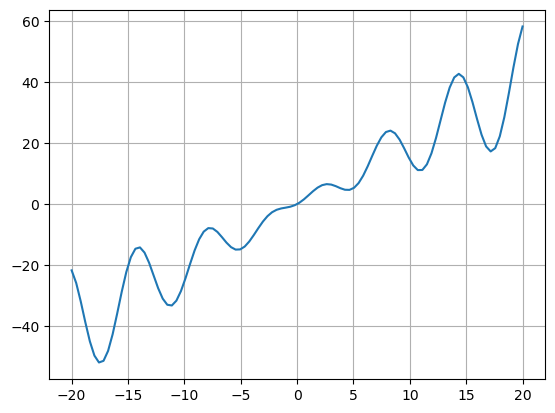

In [7]:
tmpDf = pd.DataFrame([X.reshape(-1,),y]).T
tmpDf = tmpDf.sort_values(by=0)
plt.plot(tmpDf[0], tmpDf[1])
plt.grid()
plt.show()

**3)** Trying Simple Linear Regression model

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = True)
X_train = X_train.reshape(-1, 1)
reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test.reshape(-1,1))

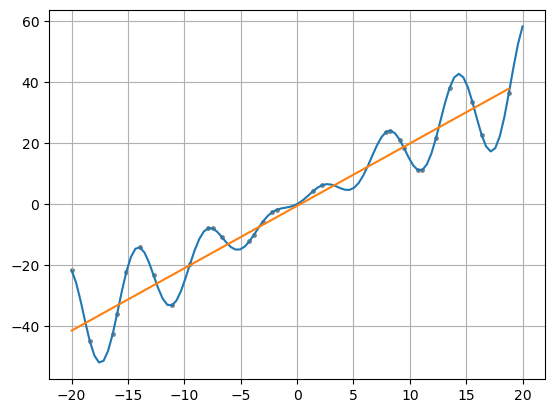

R2: 0.8919916855111649


In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = True)
X_train = X_train.reshape(-1, 1)
reg.fit(X_train, y_train)
plotTestAndReg(reg, X, y, X_test, y_test)
print_r2_score(reg, X_test, y_test)

Assess r2 with Cross_val_score

In [11]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
r2 = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2')

In [12]:
print(r2)

[0.87793274 0.86539357 0.88377977 0.81974556 0.86187895]


Trying using a pipeline with Polynomial Features and Lasso

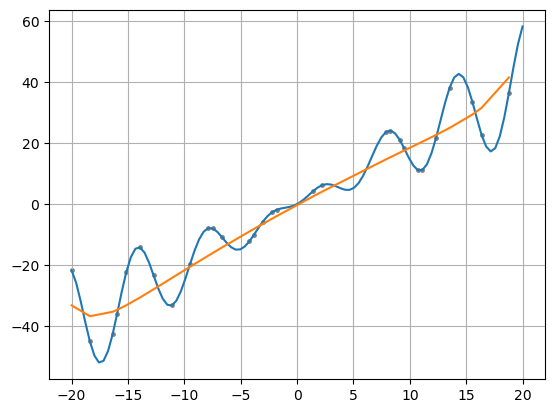

R2: 0.9016620401935717


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(15), Lasso(alpha=0.5, tol=0.2))
reg.fit(X_train, y_train)
plotTestAndReg(reg, X, y, X_test, y_test)
print_r2_score(reg, X_test, y_test)

Trying using a pipeline with Polynomial Features(5), Ridge and Lasso

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X_train)

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

regR = Ridge(alpha = 0.5)
regL = Lasso(alpha = 0.5)

regR.fit(X_poly, y_train)
regL.fit(X_poly, y_train)

X_poly_test = poly.transform(X_test)

y_test_predR = regR.predict(X_poly_test)
y_test_predL = regL.predict(X_poly_test)

print("ridge r2:", r2_score(y_test, y_test_predR))
print("lasso r2:", r2_score(y_test, y_test_predL))

ridge r2: 0.8912615672361373
lasso r2: 0.8920715591716731


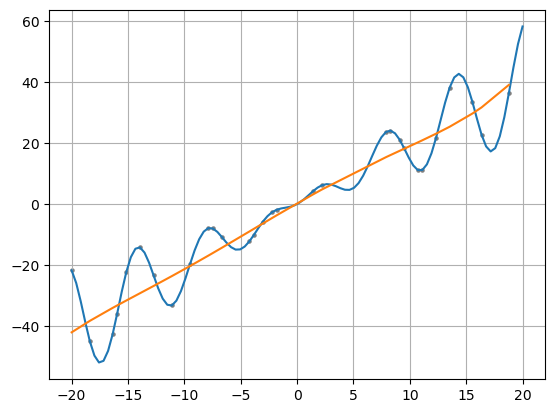

In [15]:
plt.plot(X,y)
plt.scatter(X_test, y_test, s = 5, c = 'grey')
plt.grid()
plt.plot(X_test, y_test_predR)

Trying using Ridge and Lasso

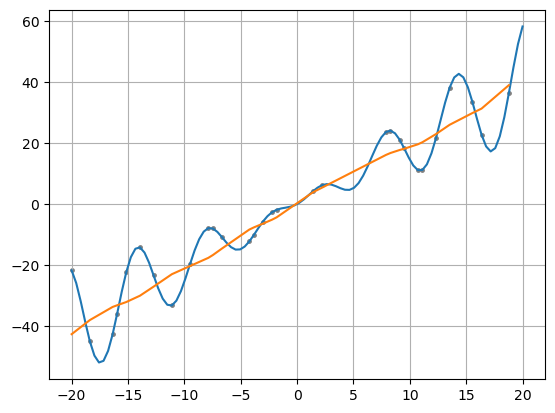

lasso r2: 0.8883000762933942


In [16]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer

pipeSinPolLasso = make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(5), [0])
        ),
        Ridge(alpha=1)
    )

pipeSinPolLasso.fit(X_train, y_train)

y_test_predL = pipeSinPolLasso.predict(X_test.reshape(-1,1))
plotTestAndReg(pipeSinPolLasso, X, y, X_test, y_test)

print("lasso r2:", r2_score(y_test, y_test_predL))

In [17]:
#polinomial regression, cross validation
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree':list(range(2,20,2)), 
              'lasso__alpha':[1e-2, 0.1, 1]}

gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=5)
res = gridsearch.fit(X_train.reshape(-1,1), y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with R2=%.2f" % res.best_score_)

Best model configuration is:
{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 18}
with R2=0.87


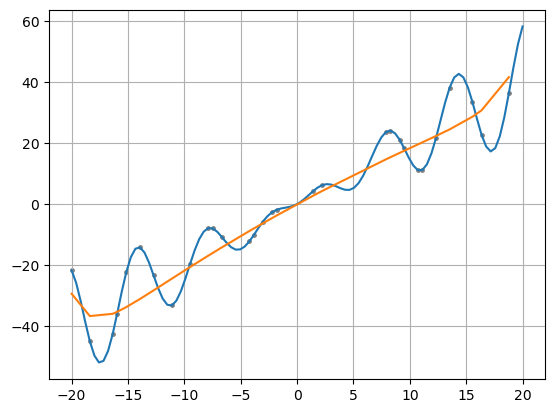

R2: 0.9052118080057366


In [18]:
final_model = res.best_estimator_
final_model.fit(X_train, y_train)
plotTestAndReg(final_model, X, y, X_test, y_test)
print_r2_score(final_model, X_test, y_test)

## Function 2

In [19]:
tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)
y = f2(X)
X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

100


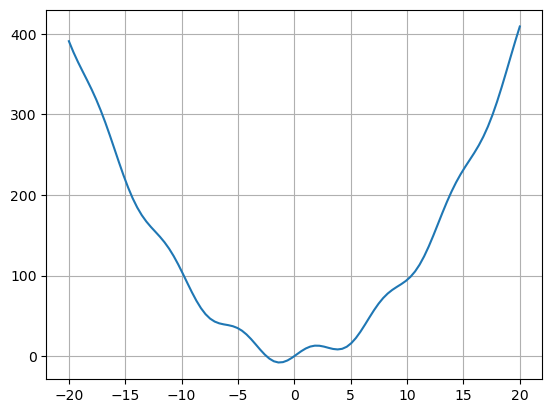

In [20]:
tmpDf = pd.DataFrame([X.reshape(-1,),y]).T
tmpDf = tmpDf.sort_values(by=0)
print(len(tmpDf))
plt.plot(tmpDf[0], tmpDf[1])
plt.grid()
plt.show()

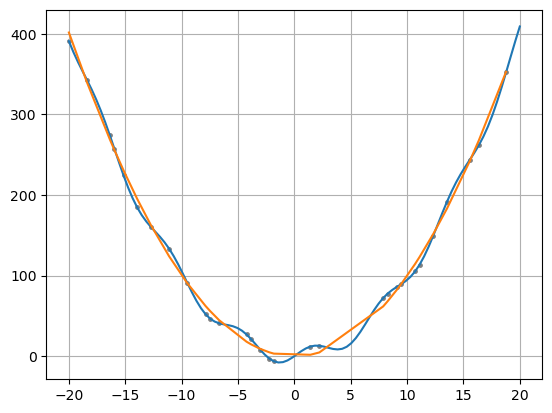

R2: 0.9959074056749465


In [21]:
crossPolinomial(X_train, X_test, y_train, y_test)

## Function 3

In [22]:
tr = 20
n_samples = 100
X = np.linspace(-tr, tr, n_samples)
y = f3(X)
X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.7, random_state=42, shuffle=True)
y_test = y_test[X_test.argsort()]
X_test.sort()

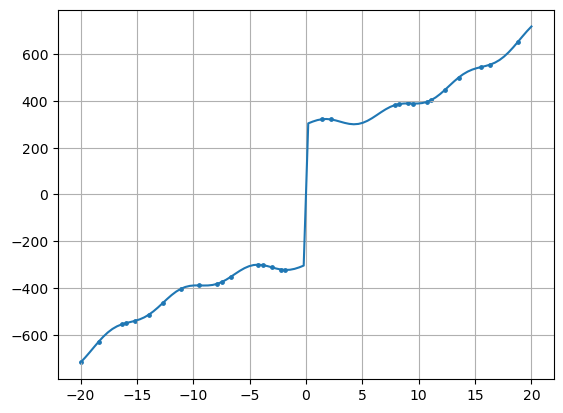

In [23]:
plt.plot(X, y)
plt.scatter(X_test, y_test, s = 6)
plt.grid()
plt.show()

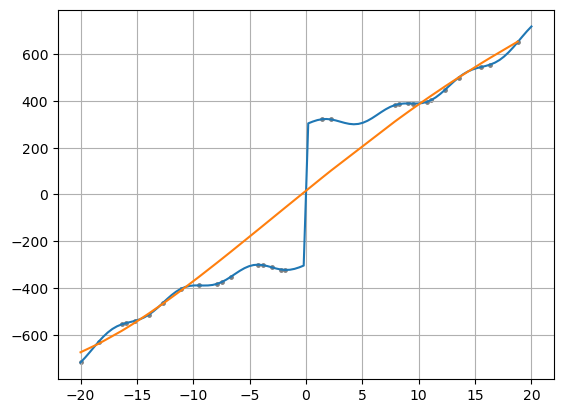

R2: 0.9359205971492549


In [24]:
crossPolinomial(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

Try with randomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

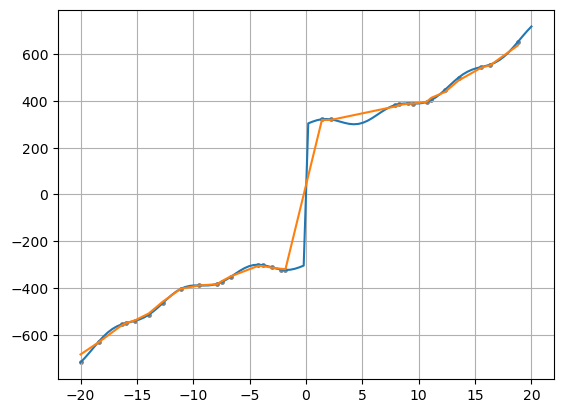

R2: 0.9996684020757362


In [26]:
reg = make_pipeline(PolynomialFeatures(), RandomForestRegressor())
param_grid = {'polynomialfeatures__degree':list(range(2,20,2)), 
          'randomforestregressor__n_estimators':list(range(10, 101, 10)),
              "randomforestregressor__min_impurity_decrease": [0, .01, .03, .07, .09, .11]}

gridsearch = GridSearchCV(reg, param_grid, scoring='r2', cv=5)
res = gridsearch.fit(X_train.reshape(-1,1), y_train)

final_model = res.best_estimator_
final_model.fit(X_train.reshape(-1,1), y_train)
plotTestAndReg(final_model, X, y, X_test, y_test)
print_r2_score(final_model, X_test, y_test)

In [27]:
res.best_params_

{'polynomialfeatures__degree': 2,
 'randomforestregressor__min_impurity_decrease': 0.09,
 'randomforestregressor__n_estimators': 30}

## Esercizio 2

In [28]:
from sklearn.datasets import make_regression

In [29]:
X, y = make_regression(n_samples=2000, random_state=42)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.7, random_state=42, shuffle=True)

Using Polinomial Features and RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


reg = make_pipeline(PolynomialFeatures(), RandomForestRegressor())
reg.fit(X_train, y_train)
print(r2_score(y_test, reg.predict(X_test)))

0.6686275095272971


Using just Linear Regression

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(r2_score(y_test, reg.predict(X_test)))

1.0


Adding noise and testing the same models

In [33]:
X, y = make_regression(n_samples=2000, random_state=42, noise=15)
X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=0.7, random_state=42, shuffle=True)

In [34]:
reg = make_pipeline(PolynomialFeatures(), RandomForestRegressor())
reg.fit(X_train, y_train)
print(r2_score(y_test, reg.predict(X_test)))

0.6886009484687696


In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(r2_score(y_test, reg.predict(X_test)))

0.993789396384711


## Esercizio 3

In [36]:
toKeepCols = ['STA', 'Date', 'MaxTemp', 'MinTemp', 'MeanTemp']
df = pd.read_csv("data\SummaryofWeather.csv", parse_dates=["Date"], usecols = toKeepCols)
df

,STA,Date,MaxTemp,MinTemp,MeanTemp
0,10001,1942-07-01,25.555556,22.222222,23.888889
1,10001,1942-07-02,28.888889,21.666667,25.555556
2,10001,1942-07-03,26.111111,22.222222,24.444444
3,10001,1942-07-04,26.666667,22.222222,24.444444
4,10001,1942-07-05,26.666667,21.666667,24.444444
...,...,...,...,...,...
119035,82506,1945-12-27,28.333333,18.333333,23.333333
119036,82506,1945-12-28,29.444444,18.333333,23.888889
119037,82506,1945-12-29,28.333333,18.333333,23.333333
119038,82506,1945-12-30,28.333333,18.333333,23.333333


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   STA       119040 non-null  int64         
 1   Date      119040 non-null  datetime64[ns]
 2   MaxTemp   119040 non-null  float64       
 3   MinTemp   119040 non-null  float64       
 4   MeanTemp  119040 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 4.5 MB


In [38]:
mostCompletedSTA = df['STA'].value_counts().head(10).index
df['STA'].value_counts().head(10)

22508    2192
10701    2185
22502    2154
22504    2118
10803    1750
11610    1631
16405    1622
11601    1604
10502    1527
11604    1514
Name: STA, dtype: int64

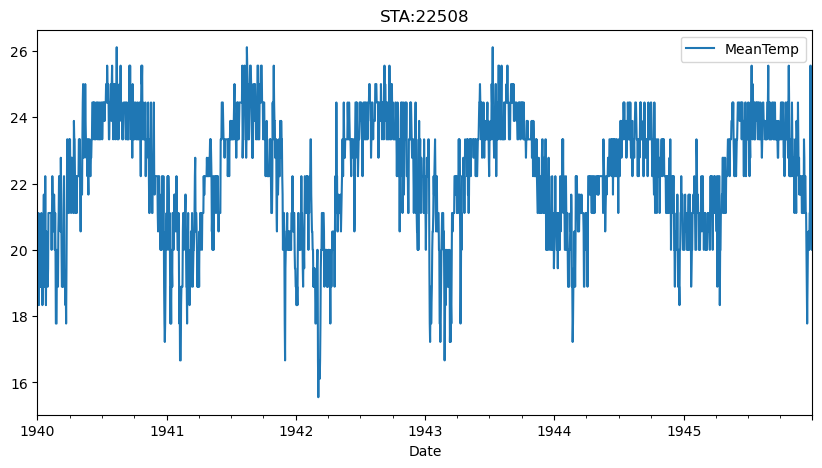

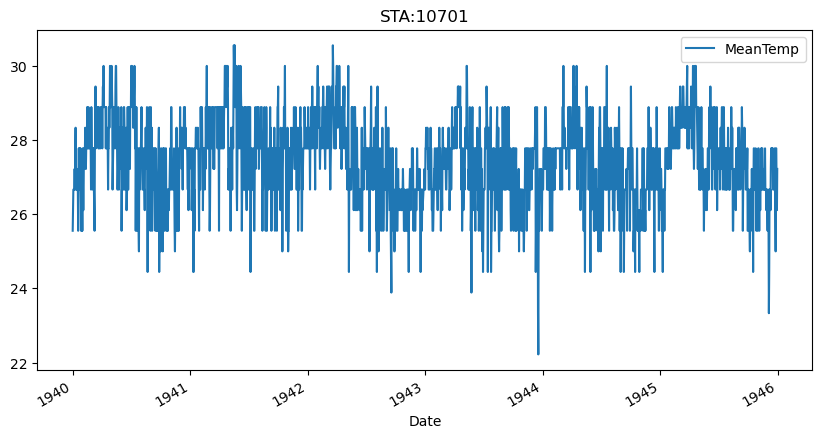

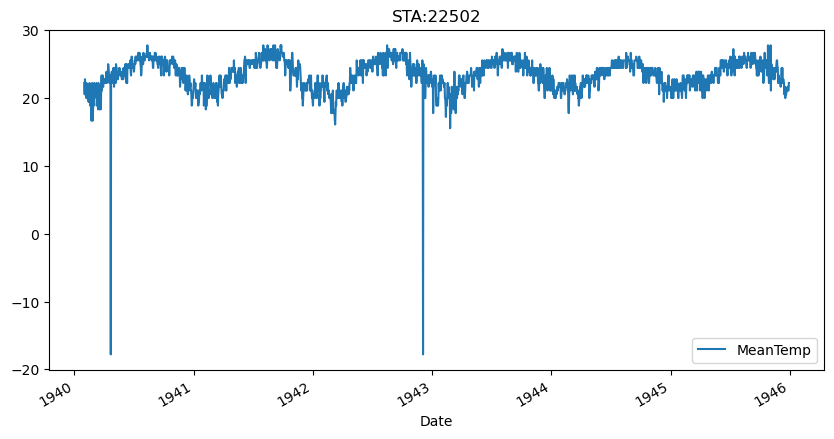

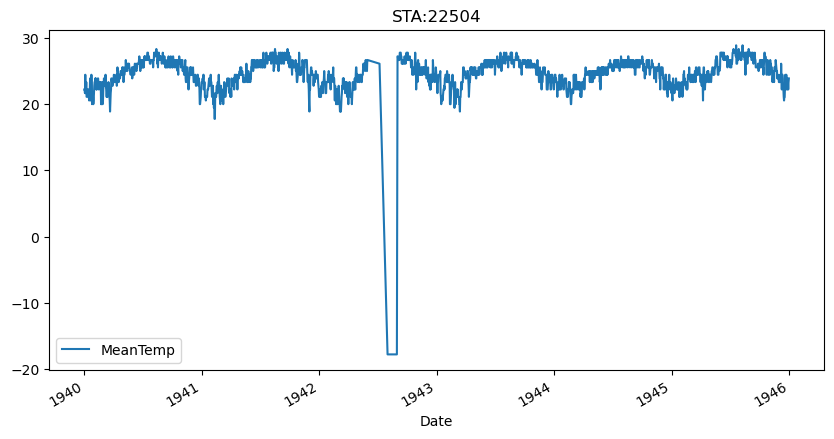

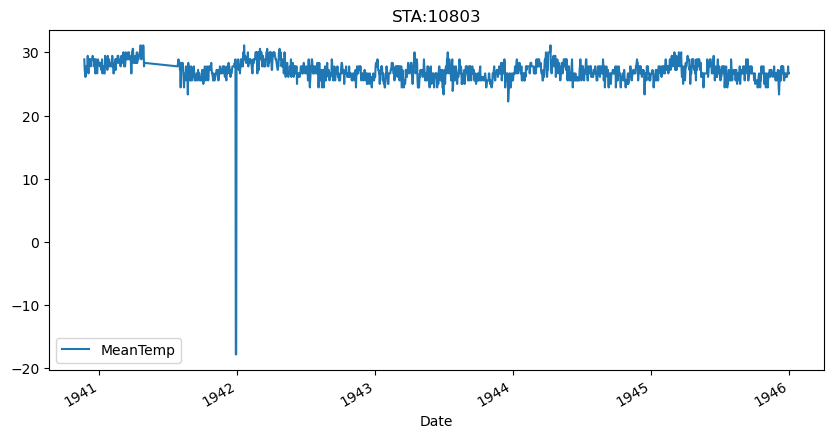

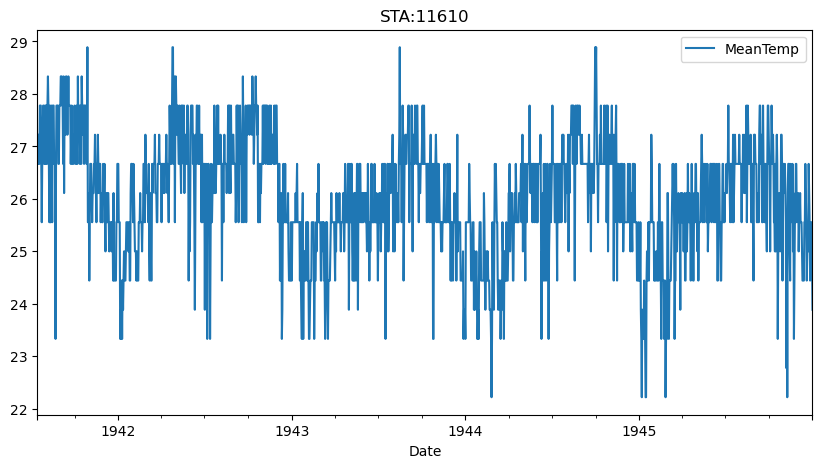

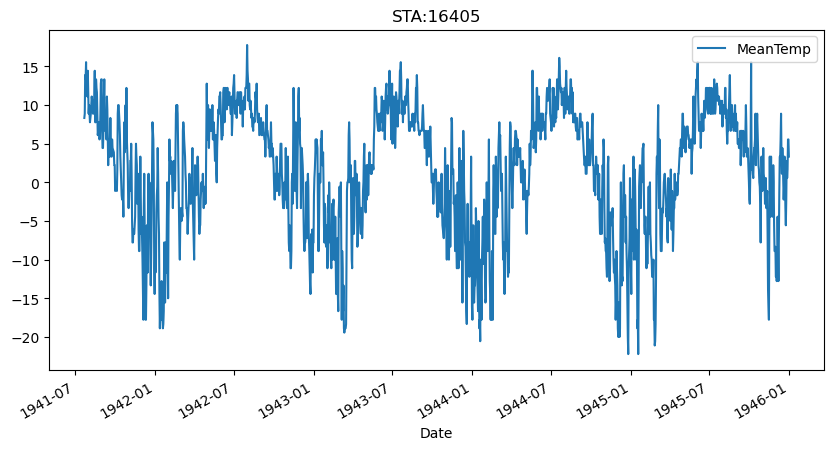

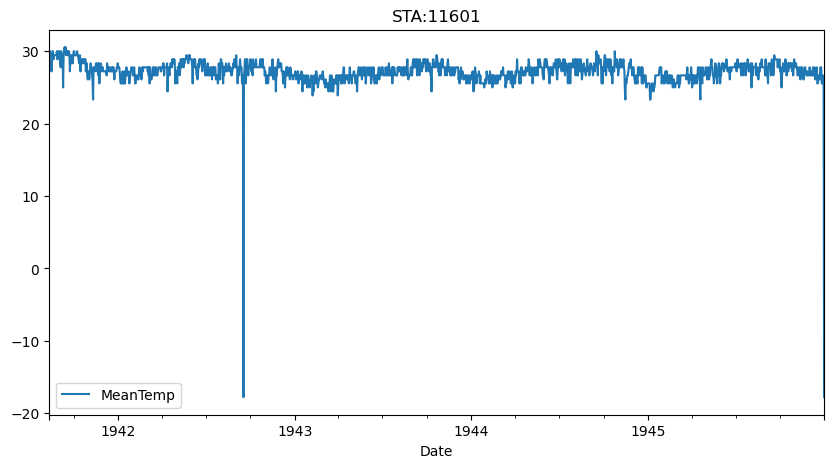

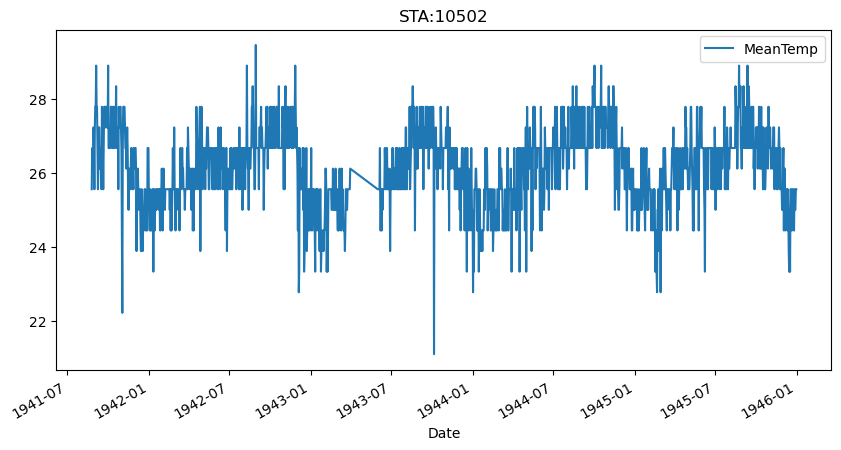

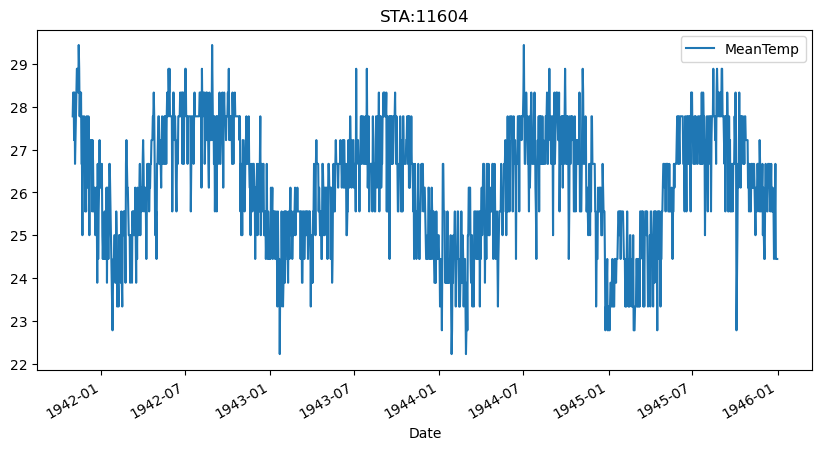

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
for STA in mostCompletedSTA:
    df[df.STA == STA].plot(x = "Date", y = "MeanTemp")
    plt.title(f'STA:{STA}')

Now we consider just STA 22508

Text(0.5, 1.0, 'STA: 22508')

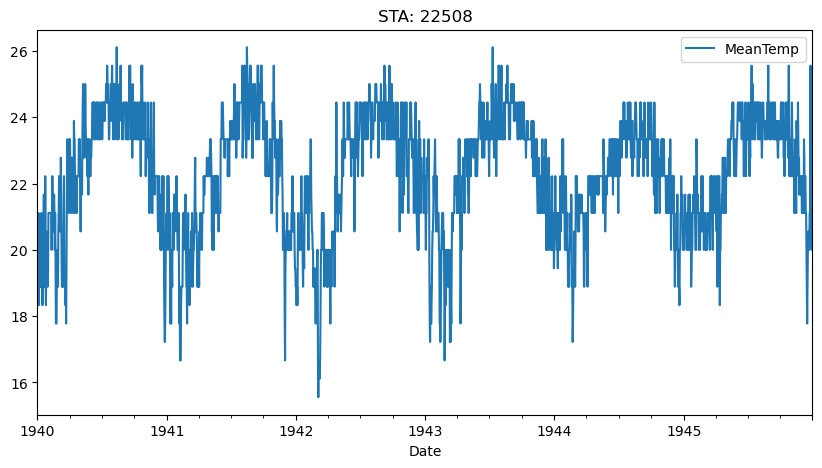

In [40]:
df[df['STA'] == 22508].plot(x = "Date", y = "MeanTemp")
plt.title('STA: 22508')

In [41]:
windowsDf = df[df['STA'] == 22508].drop(['MaxTemp', 'MinTemp', 'STA'], axis = 1)
windowsDf.head()

,Date,MeanTemp
57877,1940-01-01,20.000000
57878,1940-01-02,19.444444
57879,1940-01-03,20.000000
57880,1940-01-04,21.111111
57881,1940-01-05,18.333333


In [42]:
W = 3  #define the lenght of the window
for i in range(1, W+1):
    if i == W:
        yDf = pd.DataFrame()
        yDf['Date'] = windowsDf['Date']
        yDf[f't+{i} (y)'] = windowsDf.MeanTemp.shift(-i)

    else:
        windowsDf[f't+{i}'] = windowsDf.MeanTemp.shift(-i)

windowsDf = windowsDf.set_index('Date')
yDf = yDf.set_index('Date')

In [43]:
import datetime as dt

In [44]:
windowsDf.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=2192)

In [45]:
windowsDf['Month'] = windowsDf.index.month

In [46]:
season_dict = {1: 0,
               2: 0,
               3: 1, 
               4: 1,
               5: 1,
               6: 2,
               7: 2,
               8: 2,
               9: 3,
               10: 3,
               11: 3,
               12: 0}
windowsDf['Season'] = windowsDf['Month'].apply(lambda x: season_dict[x])
windowsDf = windowsDf.drop(columns='Month')
windowsDf

,MeanTemp,t+1,t+2,Season
Date,,,,
1940-01-01,20.000000,19.444444,20.000000,0
1940-01-02,19.444444,20.000000,21.111111,0
1940-01-03,20.000000,21.111111,18.333333,0
1940-01-04,21.111111,18.333333,20.000000,0
1940-01-05,18.333333,20.000000,20.555556,0
...,...,...,...,...
1945-12-27,20.555556,21.111111,20.000000,0
1945-12-28,21.111111,20.000000,21.111111,0
1945-12-29,20.000000,21.111111,21.666667,0


In [47]:
yDf = yDf['t+3 (y)']
yDf
#print(type(yDf['t+3 (y)']))

Date
1940-01-01    21.111111
1940-01-02    18.333333
1940-01-03    20.000000
1940-01-04    20.555556
1940-01-05    18.888889
                ...    
1945-12-27    21.111111
1945-12-28    21.666667
1945-12-29          NaN
1945-12-30          NaN
1945-12-31          NaN
Name: t+3 (y), Length: 2192, dtype: float64

In [48]:
X_train = windowsDf.loc['1940':'1944']
X_test = windowsDf.loc['1945']
y_train = yDf.loc['1940':'1944']
y_test = yDf.loc['1945']

Start in the Wth day of the test set since they are included in the training set.
End W days before the end of the year since there are Nan values because of the shift.

In [49]:
from datetime import date
initial_day = date(1944, 12, 31) + pd.Timedelta(f"{W} days")
final_date = date(1945, 12, 31) - pd.Timedelta(f"{W} days")
print(initial_day)
print(final_date)

1945-01-03
1945-12-28


In [50]:
y_train.tail()

Date
1944-12-27    20.0
1944-12-28    20.0
1944-12-29    20.0
1944-12-30    20.0
1944-12-31    20.0
Name: t+3 (y), dtype: float64

In [51]:
X_test, y_test = X_test.loc[initial_day:final_date], y_test.loc[initial_day:final_date] 
X_test.tail()

,MeanTemp,t+1,t+2,Season
Date,,,,
1945-12-24,21.111111,25.555556,25.555556,0
1945-12-25,25.555556,25.555556,20.555556,0
1945-12-26,25.555556,20.555556,21.111111,0
1945-12-27,20.555556,21.111111,20.000000,0
1945-12-28,21.111111,20.000000,21.111111,0


**7**

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from prettytable import PrettyTable

degree = 5
models = [
    LinearRegression(),
    Ridge(random_state=42),
    MLPRegressor(hidden_layer_sizes=(10,), random_state=42, max_iter=10000),
    MLPRegressor(hidden_layer_sizes=(10,10),  activation='tanh', solver='lbfgs',
                 alpha=0.000, batch_size='auto', learning_rate='constant',
                 learning_rate_init=0.01, power_t=0.5, max_iter=10000, shuffle=True,
                 random_state=42, tol=0.0001, verbose=True, warm_start=False,
                 momentum=0.0, nesterovs_momentum=False, early_stopping=False,
                 validation_fraction=0.0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
    SVR(gamma='scale'),
    RandomForestRegressor(n_estimators=300),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(degree), [0])
        ),
        LinearRegression()
    ),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(degree), [0])
        ),
        Ridge(alpha=1)
    )
]

names = [
    'linreg',
    'ridge',
    'mlp_standard',
    'mlp_tuned',
    'svr',
    'rf',
    f'sin+poly{degree}+linreg',
    f'sin+poly{degree}+ridge'
]

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

t = PrettyTable()
t.field_names = ['model', 'MSE', 'R2']

for model, name in zip(models, names):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hat)
    r2 = r2_score(y_test, y_hat)
    t.add_row([name, mse, r2])

print(t)

+------------------+--------------------+--------------------+
|      model       |        MSE         |         R2         |
+------------------+--------------------+--------------------+
|      linreg      | 0.7561758717993939 | 0.6747921126614838 |
|      ridge       | 0.7561096351327364 | 0.6748205990060384 |
|   mlp_standard   | 0.7982353179230149 | 0.6567036439247826 |
|    mlp_tuned     | 0.753975888188669  | 0.675738257664128  |
|       svr        | 0.7460762778117774 | 0.6791356361011749 |
|        rf        | 0.7944522260421079 | 0.6583306348988133 |
| sin+poly5+linreg | 1.1396245117475912 | 0.5098826957507806 |
| sin+poly5+ridge  | 1.1393130235083981 | 0.5100166572218836 |
+------------------+--------------------+--------------------+


Testing SVR

'The average |error| is: 0.65 +- 0.57 degrees Celsius'

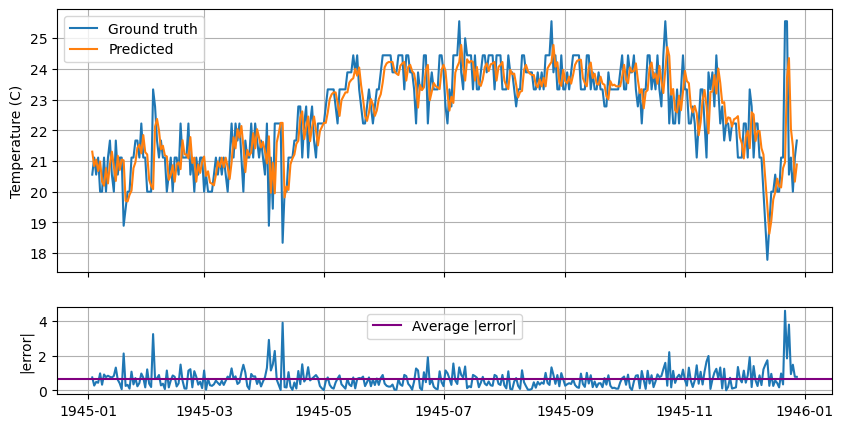

In [54]:
model = SVR(gamma='scale')
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
y_hat = pd.Series(y_hat, index=y_test.index)    
error = y_test - y_hat

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].plot(y_test, label="Ground truth")
ax[0].plot(y_hat, label="Predicted")
ax[0].set_ylabel("Temperature (C)")
ax[0].legend()
ax[0].grid()

ax[1].plot(error.abs())
ax[1].set_ylabel("|error|")
ax[1].axhline(error.abs().mean(), color="purple", label = "Average |error|")
ax[1].legend()
ax[1].grid()

f"The average |error| is: {error.abs().mean():.2f} +- {error.abs().std():.2f} degrees Celsius"

Testing Ridge

'The average |error| is: 0.66 +- 0.57 degrees Celsius'

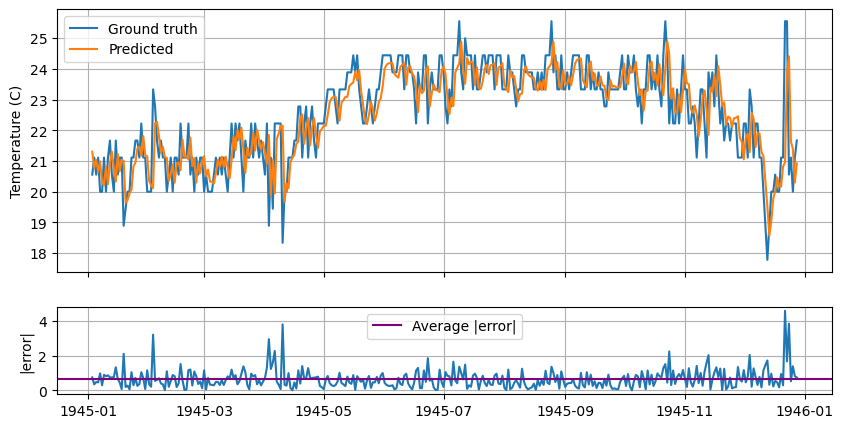

In [55]:
model = Ridge(random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
y_hat = pd.Series(y_hat, index=y_test.index)    
error = y_test - y_hat

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].plot(y_test, label="Ground truth")
ax[0].plot(y_hat, label="Predicted")
ax[0].set_ylabel("Temperature (C)")
ax[0].legend()
ax[0].grid()

ax[1].plot(error.abs())
ax[1].set_ylabel("|error|")
ax[1].axhline(error.abs().mean(), color="purple", label = "Average |error|")
ax[1].legend()
ax[1].grid()

f"The average |error| is: {error.abs().mean():.2f} +- {error.abs().std():.2f} degrees Celsius"    